In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

In [3]:
df = pd.read_csv('movie.csv')

In [4]:
df.head()

,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1


In [5]:
df.tail()


,text,label
39995,"""Western Union"" is something of a forgotten cl...",1
39996,This movie is an incredible piece of work. It ...,1
39997,My wife and I watched this movie because we pl...,0
39998,"When I first watched Flatliners, I was amazed....",1
39999,"Why would this film be so good, but only gross...",1


In [6]:
df.shape

(40000, 2)

In [7]:
df.columns

Index(['text', 'label'], dtype='object')

In [8]:
df.duplicated().sum()

277

In [9]:
df.drop_duplicates(inplace=True)


In [10]:
df.isnull().sum()

text     0
label    0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39723 entries, 0 to 39999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    39723 non-null  object
 1   label   39723 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 931.0+ KB


In [12]:
df.describe()

,label
count,39723.000000
mean,0.501171
std,0.500005
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [13]:
df.nunique()

text     39723
label        2
dtype: int64

In [14]:
df['label'].value_counts()

label
1    19908
0    19815
Name: count, dtype: int64

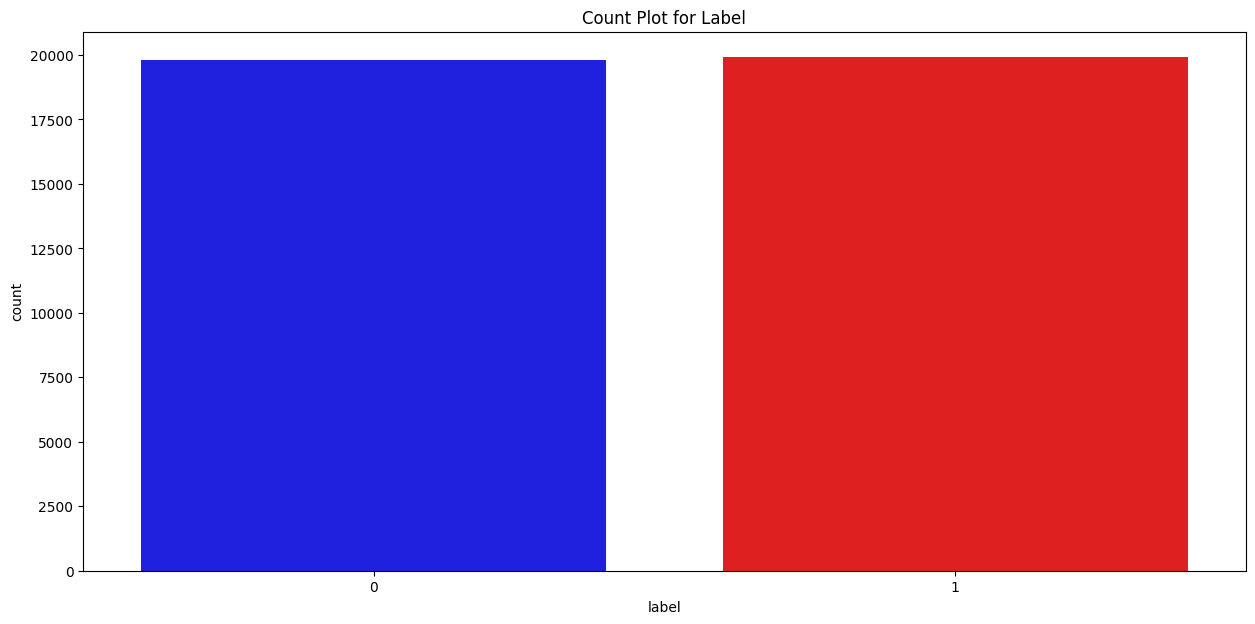

In [15]:
plt.figure(figsize=[15,7])
plt.title('Count Plot for Label')
color=['blue', 'red']
sns.countplot(x='label', data=df, palette=color)
plt.show()

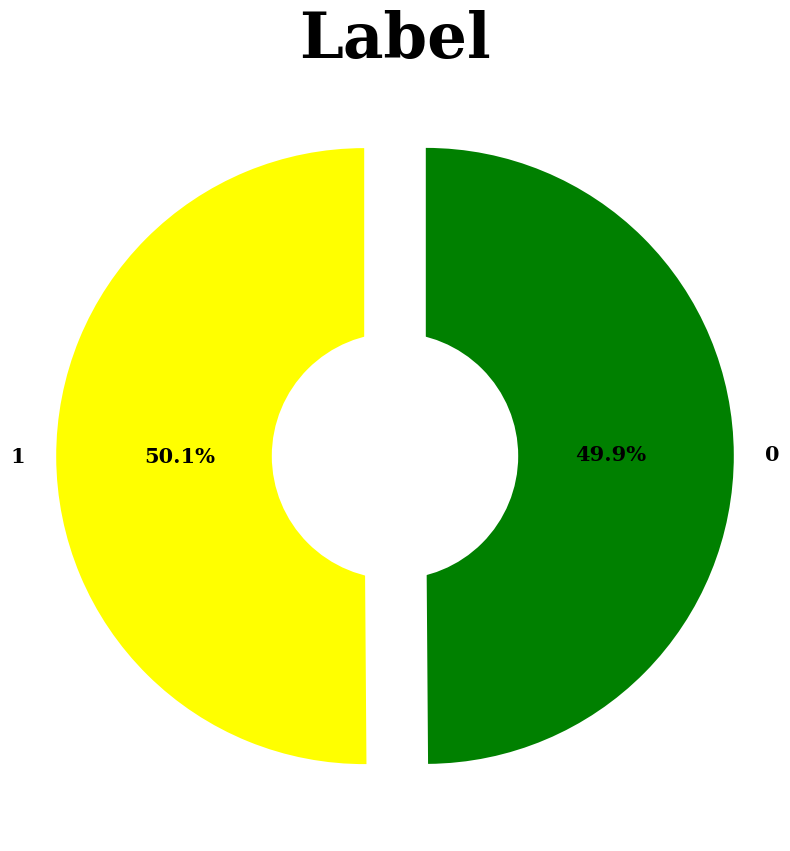

In [16]:
label_data=df['label'].value_counts()
explode = (0.1, 0.1)
plt.figure(figsize=(14, 10))
patches, texts, pcts = plt.pie(label_data,
                               labels = label_data.index,
                               colors = ['yellow', 'green'],
                               pctdistance = 0.6,
                               shadow = False,
                               startangle = 90,
                               explode = explode,
                               autopct = '%1.1f%%',
                               textprops = {'fontsize':15,
                                           'color': 'black',
                                            'weight':'bold',
                                            'family': 'serif'})
plt.setp(pcts, color = 'black')
hfont = {'fontname':'serif', 'weight':'bold'}
plt.title('Label', size=45, **hfont)
centre_circle = plt.Circle((0,0), 0.40, fc = 'white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.show()


In [17]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import WordNetLemmatizer
from nltk import tokenize

In [18]:
df.text=df.text.apply(lambda x: x.lower())

In [19]:
df

,text,label
0,i grew up (b. 1965) watching and loving the th...,0
1,"when i put this movie in my dvd player, and sa...",0
2,why do people who do not know what a particula...,0
3,even though i have great interest in biblical ...,0
4,im a die hard dads army fan and nothing will e...,1
...,...,...
39995,"""western union"" is something of a forgotten cl...",1
39996,this movie is an incredible piece of work. it ...,1
39997,my wife and i watched this movie because we pl...,0
39998,"when i first watched flatliners, i was amazed....",1


In [20]:
import contractions


In [21]:
def con(text):
    expand=contractions.fix(text)
    return expand
df.text=df.text.apply(con)
df['text'][0]
    

'i grew up (b. 1965) watching and loving the thunderbirds. all my mates at school watched. we played "thunderbirds" before school, during lunch and after school. we all wanted to be virgil or scott. no one wanted to be alan. counting down from 5 became an art form. i took my children to see the movie hoping they would get a glimpse of what i loved as a child. how bitterly disappointing. the only high point was the snappy theme tune. not that it could compare with the original score of the thunderbirds. thankfully early saturday mornings one television channel still plays reruns of the series gerry anderson and his wife created. jonatha frakes should hand in his directors chair, his version was completely hopeless. a waste of film. utter rubbish. a cgi remake may be acceptable but replacing marionettes with homo sapiens subsp. sapiens was a huge error of judgment.'

In [22]:
import re

def remove_sp(text):
    pattern=r'[^A-Za-z0-9\s]'
    text=re.sub(pattern, '', text)
    return text
df.text=df.text.apply(remove_sp)
df

,text,label
0,i grew up b 1965 watching and loving the thund...,0
1,when i put this movie in my dvd player and sat...,0
2,why do people who do not know what a particula...,0
3,even though i have great interest in biblical ...,0
4,i am a die hard dads army fan and nothing will...,1
...,...,...
39995,western union is something of a forgotten clas...,1
39996,this movie is an incredible piece of work it e...,1
39997,my wife and i watched this movie because we pl...,0
39998,when i first watched flatliners i was amazed i...,1


In [23]:
import string
punctuations=list(string.punctuation)
df.text=df.text.apply(lambda x: " ".join(x for x in x.split() if x not in punctuations))
df

,text,label
0,i grew up b 1965 watching and loving the thund...,0
1,when i put this movie in my dvd player and sat...,0
2,why do people who do not know what a particula...,0
3,even though i have great interest in biblical ...,0
4,i am a die hard dads army fan and nothing will...,1
...,...,...
39995,western union is something of a forgotten clas...,1
39996,this movie is an incredible piece of work it e...,1
39997,my wife and i watched this movie because we pl...,0
39998,when i first watched flatliners i was amazed i...,1


In [24]:
nltk.download('stopwords')
stopwords_list=stopwords.words('english')
stopwords_list.remove('no')
stopwords_list.remove('not')
df.text=df.text.apply(lambda x: " ".join(x for x in x.split() if x not in stopwords_list))
df

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,text,label
0,grew b 1965 watching loving thunderbirds mates...,0
1,put movie dvd player sat coke chips expectatio...,0
2,people not know particular time past like feel...,0
3,even though great interest biblical movies bor...,0
4,die hard dads army fan nothing ever change got...,1
...,...,...
39995,western union something forgotten classic west...,1
39996,movie incredible piece work explores every noo...,1
39997,wife watched movie plan visit sicily stromboli...,0
39998,first watched flatliners amazed necessary feat...,1


In [25]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [26]:
df['text']=df.text.apply(word_tokenize)
df['text'][0]

['grew',
 'b',
 '1965',
 'watching',
 'loving',
 'thunderbirds',
 'mates',
 'school',
 'watched',
 'played',
 'thunderbirds',
 'school',
 'lunch',
 'school',
 'wanted',
 'virgil',
 'scott',
 'no',
 'one',
 'wanted',
 'alan',
 'counting',
 '5',
 'became',
 'art',
 'form',
 'took',
 'children',
 'see',
 'movie',
 'hoping',
 'would',
 'get',
 'glimpse',
 'loved',
 'child',
 'bitterly',
 'disappointing',
 'high',
 'point',
 'snappy',
 'theme',
 'tune',
 'not',
 'could',
 'compare',
 'original',
 'score',
 'thunderbirds',
 'thankfully',
 'early',
 'saturday',
 'mornings',
 'one',
 'television',
 'channel',
 'still',
 'plays',
 'reruns',
 'series',
 'gerry',
 'anderson',
 'wife',
 'created',
 'jonatha',
 'frakes',
 'hand',
 'directors',
 'chair',
 'version',
 'completely',
 'hopeless',
 'waste',
 'film',
 'utter',
 'rubbish',
 'cgi',
 'remake',
 'may',
 'acceptable',
 'replacing',
 'marionettes',
 'homo',
 'sapiens',
 'subsp',
 'sapiens',
 'huge',
 'error',
 'judgment']

In [27]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [28]:
lemmatizer=WordNetLemmatizer()
df.text=df.text.apply(lambda x: [lemmatizer.lemmatize(word) for word in x])
df

,text,label
0,"[grew, b, 1965, watching, loving, thunderbird,...",0
1,"[put, movie, dvd, player, sat, coke, chip, exp...",0
2,"[people, not, know, particular, time, past, li...",0
3,"[even, though, great, interest, biblical, movi...",0
4,"[die, hard, dad, army, fan, nothing, ever, cha...",1
...,...,...
39995,"[western, union, something, forgotten, classic...",1
39996,"[movie, incredible, piece, work, explores, eve...",1
39997,"[wife, watched, movie, plan, visit, sicily, st...",0
39998,"[first, watched, flatliners, amazed, necessary...",1


In [29]:
df.text=df.text.astype(str)

In [30]:
import numpy as np
review_list=df['text'].array
review_list.shape

(39723,)

In [31]:
x=df.iloc[:,0].values
y=df.iloc[:,1].values

In [32]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)
print(x_train.shape)
x_test.shape

(29792,)


(9931,)

In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

In [41]:
final = Pipeline([('vect', TfidfVectorizer()),
                  ('model' , SVC(probability=False))])

In [42]:
final.fit(x_train, y_train)

Pipeline(steps=[('vect', TfidfVectorizer()), ('model', SVC())])

In [43]:
y_pred = final.predict(x_test)
y_pred

array([1, 0, 1, ..., 1, 0, 0], dtype=int64)

In [44]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [45]:
accuracy_score(y_pred, y_test)

0.8942704662168965

In [46]:
confusion_matrix(y_pred, y_test)

array([[4467,  447],
       [ 603, 4414]], dtype=int64)

In [47]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.88      0.91      0.89      4914
           1       0.91      0.88      0.89      5017

    accuracy                           0.89      9931
   macro avg       0.89      0.89      0.89      9931
weighted avg       0.89      0.89      0.89      9931



In [48]:
x_test[1]

"['movie', 'start', 'board', 'meeting', 'major', 'advertising', 'agency', 'putney', 'swope', 'board', 'no', 'reason', 'fact', 'black', 'agency', 'need', 'token', 'board', 'swope', 'ignoring', 'meeting', 'reading', 'jet', 'magazine', 'big', 'table', 'everybody', 'ignoring', 'swope', 'suddenly', 'ceo', 'croak', 'spot', 'no', 'time', 'wasted', 'janitor', 'called', 'haul', 'corpse', 'board', 'immediately', 'unceremoniously', 'tackle', 'business', 'electing', 'new', 'ceo', 'vote', 'tallied', 'one', 'one', 'tension', 'built', 'finally', 'snapped', 'hilariously', 'ironic', 'climax', 'vote', 'give', 'viewer', 'delicious', 'dish', 'logical', 'implication', 'savor', 'rest', 'movie', 'ever', 'talked', 'back', 'stupid', 'television', 'commercial', 'like', 'seeing', 'movie', 'bad', 'not', 'seem', 'real', 'putney', 'swopes', 'world']"

In [50]:
final.predict([x_test[1]])

array([0], dtype=int64)

In [52]:
x_test[10]


"['time', 'gunga', 'din', 'released', 'dvd', 'can', 'not', 'accurately', 'say', 'many', 'time', 'watched', 'fine', 'film', 'never', 'tire', 'lead', 'actor', 'worked', 'well', 'together', 'victor', 'mclaglen', 'sgt', 'mcchesney', 'cary', 'grant', 'sgt', 'cutter', 'douglas', 'fairbanks', 'jr', 'sgt', 'ballentine', 'unbeatable', 'teambr', 'br', 'can', 'not', 'get', 'exploit', 'india', 'first', 'glimpse', 'sergeant', 'three', 'see', 'engaged', 'fighting', 'soldier', 'socalled', 'treasure', 'map', 'three', 'sergeant', 'sent', 'expedition', 'find', 'happened', 'communication', 'line', 'enter', 'mostly', 'deserted', 'town', 'thinkbr', 'br', 'engage', 'necessary', 'repair', 'soon', 'find', 'resident', 'hiding', 'soon', 'get', 'attacked', 'group', 'madman', 'barely', 'make', 'escape', 'back', 'basebr', 'br', 'later', 'sent', 'another', 'mission', 'give', 'sgt', 'cutter', 'chance', 'go', 'hunting', 'gold', 'din', 'find', 'temple', 'gold', 'trapped', 'evil', 'kali', 'supporter', 'din', 'sent', 'f

In [53]:
final.predict([x_test[10]])

array([1], dtype=int64)

In [51]:
import pickle
pickle.dump(final, open('sentiment_analysis_model.p', 'wb'))